In [13]:
from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV

In [4]:
NPI_data = pd.read_csv('C:/Users/600037202/Documents/NPI_evaluation.csv')
df_month = pd.get_dummies(NPI_data['Month'])
NPI_dummied = pd.concat([NPI_data, df_month], axis=1)
#NPI_dummied['logQ'] = np.log(NPI_dummied.Quantity)
NPI_dummied.head(10)
#print(NPI_dummied.columns)
X_data = NPI_dummied.iloc[:, 2:16] 
Y_data = NPI_dummied.iloc[:, 0]
#X_data.shape, Y_data.head(5)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
float_array_X = X_data.values
float_array_Y = Y_data.values
#X_data = scaler.fit_transform(float_array_X)
#Y_data = scaler.fit_transform(float_array_Y)  
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)
#print(X_train.columns)  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
X_data_new = NPI_dummied.iloc[:, 2:16]
coeff_df = pd.DataFrame(regressor.coef_, X_data_new.columns, columns=['Coefficient'])  
coeff_df  

,Coefficient
SI,3650.859515
Price,-1797.088989
April,600.179023
Aug,2051.273541
Dec,-640.903778
Feb,-1324.213385
Jan,-501.090980
July,-13.448936
June,180.185361
March,-127.346765


In [5]:
y_pred = regressor.predict(X_test)  
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
29,50,415.867768
4,3006,8746.130489
26,250,613.411896
30,2584,6621.549601
32,2410,7105.285284
37,2152,306.283438
34,4550,11001.357082
40,16888,13736.793606
7,1000,6330.299493
10,5942,10520.829070


In [6]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.1917953287522446

In [8]:
#no of features
nof_list=np.arange(1,15)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 1
Score with 1 features: 0.239872


In [14]:
NPI_data = pd.read_csv('C:/Users/600037202/Documents/NPI_evaluation.csv')
df_month = pd.get_dummies(NPI_data['Month'])
NPI_dummied = pd.concat([NPI_data, df_month], axis=1)
NPI_dummied['logQ'] = np.log(NPI_dummied.Quantity)
NPI_dummied.head(10)
#print(NPI_dummied.columns)
X_data = NPI_dummied.iloc[:, 2:17] 
Y_data = NPI_dummied.iloc[:, 0]
#X_data.shape, Y_data.head(5)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
float_array_X = X_data.values
float_array_Y = Y_data.values
#X_data = scaler.fit_transform(float_array_X)
#Y_data = scaler.fit_transform(float_array_Y)
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)
#print(X_train.columns)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
X_data_new = NPI_dummied.iloc[:, 2:17]
coeff_df = pd.DataFrame(regressor.coef_, X_data_new.columns, columns=['Coefficient'])  
coeff_df  

,Coefficient
SI,1433.782446
Price,-1169.098390
April,485.557538
Aug,1219.456823
Dec,-1202.265987
Feb,210.026576
Jan,279.799989
July,-475.408863
June,1234.899167
March,-477.460760


In [15]:
y_pred = regressor.predict(X_test)  
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
29,50,-4466.538568
4,3006,8008.264681
26,250,-2489.292576
30,2584,4894.110650
32,2410,5144.084240
37,2152,3217.313004
34,4550,7073.238610
40,16888,12994.133731
7,1000,4322.561601
10,5942,8181.705427


In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5200460189727256

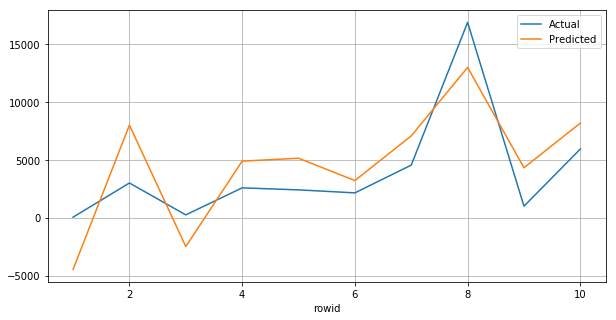

In [36]:
df['rowid'] = np.arange(1,df.shape[0]+1)
df.plot(x='rowid', y=['Actual','Predicted'] ,figsize=(10,5), grid=True  )